In [ ]:
import requests
from PIL import Image
import torch
import matplotlib.pyplot as plt
from PIL import ImageDraw

from transformers import Owlv2Processor, Owlv2ForObjectDetection

processor = Owlv2Processor.from_pretrained("google/owlv2-large-patch14")
model = Owlv2ForObjectDetection.from_pretrained("google/owlv2-large-patch14").to("cuda" if torch.cuda.is_available() else "cpu")

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
query_url = "https://i.natgeofe.com/n/548467d8-c5f1-4551-9f58-6817a8d2c45e/NationalGeographic_2572187_16x9.jpg?w=1200"
image = Image.open(requests.get(url, stream=True).raw)
query_image = Image.open(requests.get(query_url, stream=True).raw)

# Sửa: truyền query_images (không phải query_image), và bỏ texts vì dùng image-guided
inputs = processor(images=image, return_tensors="pt", images_kwargs={"query_images": query_image})  # Lưu ý: "query_images" (số nhiều)
inputs.to("cuda" if torch.cuda.is_available() else "cpu")

with torch.no_grad():
    # Sửa: dùng image_guided_detection thay vì forward()
    outputs = model.image_guided_detection(**inputs)

# Target image sizes (height, width) to rescale box predictions [batch_size, 2]
target_sizes = torch.Tensor([image.size[::-1]])

# Sửa: dùng post_process_image_guided_detection (không deprecated), bỏ threshold nếu muốn mặc định 0.0
results = processor.post_process_image_guided_detection(outputs=outputs, target_sizes=target_sizes, threshold=0.5, nms_threshold=0.1)

i = 0  # Retrieve predictions for the first image
boxes, scores, labels = results[i]["boxes"], results[i]["scores"], results[i]["labels"]
# Sửa: labels=None trong image-guided, nên print khác (không dùng texts)
for box, score in zip(boxes, scores):
    box = [round(i, 2) for i in box.tolist()]
    print(f"Detected object with confidence {round(score.item(), 3)} at location {box}")

# Copy ảnh gốc để vẽ lên (không sửa original)
image_with_boxes = image.copy()
draw = ImageDraw.Draw(image_with_boxes)

# Vẽ boxes và scores
for box, score in zip(boxes, scores):
    # Box: (x1, y1, x2, y2) - vẽ rectangle màu đỏ, width=3
    draw.rectangle(box.tolist(), outline="red", width=3)
    # Thêm text confidence ở góc trên trái của box
    draw.text((box[0], box[1]), f"{round(score.item(), 3)}", fill="red")

# Hiển thị ảnh với boxes trong notebook
plt.figure(figsize=(10, 10))
plt.imshow(image_with_boxes)
plt.axis("off")  # Tắt trục
plt.show()


WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.11/dist-package

AttributeError: _ARRAY_API not found

WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.


ImportError: numpy.core.multiarray failed to import

WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.


WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camer

In [2]:
import requests
from PIL import Image
import torch
import matplotlib.pyplot as plt
from PIL import ImageDraw

from transformers import Owlv2Processor, Owlv2ForObjectDetection

processor = Owlv2Processor.from_pretrained("google/owlv2-large-patch14")
model = Owlv2ForObjectDetection.from_pretrained("google/owlv2-large-patch14").to("cuda" if torch.cuda.is_available() else "cpu")

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
query_url = "https://www.elc.co.uk/medias/551531-Primary-515Wx515H?context=bWFzdGVyfGltYWdlc3wzMzMxN3xpbWFnZS9qcGVnfGFXMWhaMlZ6TDJnNE15OW9aR0l2TVRFek5UWTROREl6TmpBNE5qSXVhbkJufGEwMGI5ZTdmMDA2ZDI5MzI5NGMzYjY1Y2M3NjQwZDRiZWYwMWQzZjAxNGIwYjFkOTQ1ZWFjNjY1ZmRjNzQxN2I"
image = Image.open(requests.get(url, stream=True).raw)
query_image = Image.open(requests.get(query_url, stream=True).raw)

# Sửa: truyền query_images (không phải query_image), và bỏ texts vì dùng image-guided
inputs = processor(images=image, return_tensors="pt", images_kwargs={"query_images": query_image})  # Lưu ý: "query_images" (số nhiều)
inputs.to("cuda" if torch.cuda.is_available() else "cpu")

with torch.no_grad():
    # Sửa: dùng image_guided_detection thay vì forward()
    outputs = model.image_guided_detection(**inputs)

# Target image sizes (height, width) to rescale box predictions [batch_size, 2]
target_sizes = torch.Tensor([image.size[::-1]])

# Sửa: dùng post_process_image_guided_detection (không deprecated), bỏ threshold nếu muốn mặc định 0.0
results = processor.post_process_image_guided_detection(outputs=outputs, target_sizes=target_sizes, threshold=0.5, nms_threshold=0.1)

i = 0  # Retrieve predictions for the first image
boxes, scores, labels = results[i]["boxes"], results[i]["scores"], results[i]["labels"]

# Tính diện tích ảnh (width * height)
image_area = image.size[0] * image.size[1]
max_area = 0.1 * image_area  # 20% diện tích ảnh

# Lọc boxes: giữ lại nếu area <= max_area (bỏ labels vì None)
filtered_boxes = []
filtered_scores = []

for box, score in zip(boxes, scores):  # Bỏ labels khỏi zip
    box_area = (box[2] - box[0]) * (box[3] - box[1])  # (x2 - x1) * (y2 - y1)
    if box_area <= max_area:
        filtered_boxes.append(box)
        filtered_scores.append(score)

# Cập nhật boxes, scores (bỏ labels vì None)
boxes = torch.stack(filtered_boxes) if filtered_boxes else torch.empty(0, 4)
scores = torch.stack(filtered_scores) if filtered_scores else torch.empty(0)
labels = None  # Hoặc bỏ dòng này, vì không dùng

# Sửa: labels=None trong image-guided, nên print khác (không dùng texts)
for box, score in zip(boxes, scores):
    box = [round(i, 2) for i in box.tolist()]
    print(f"Detected object with confidence {round(score.item(), 3)} at location {box}")

Detected object with confidence 0.591 at location [40.91, 72.18, 174.88, 117.07]
Detected object with confidence 0.677 at location [333.78, 77.46, 368.19, 189.64]
Detected object with confidence 0.595 at location [339.47, 123.62, 356.72, 145.34]
Detected object with confidence 0.935 at location [-12.01, 477.5, 617.15, 483.93]
Detected object with confidence 0.793 at location [-13.93, 431.21, 610.96, 476.63]


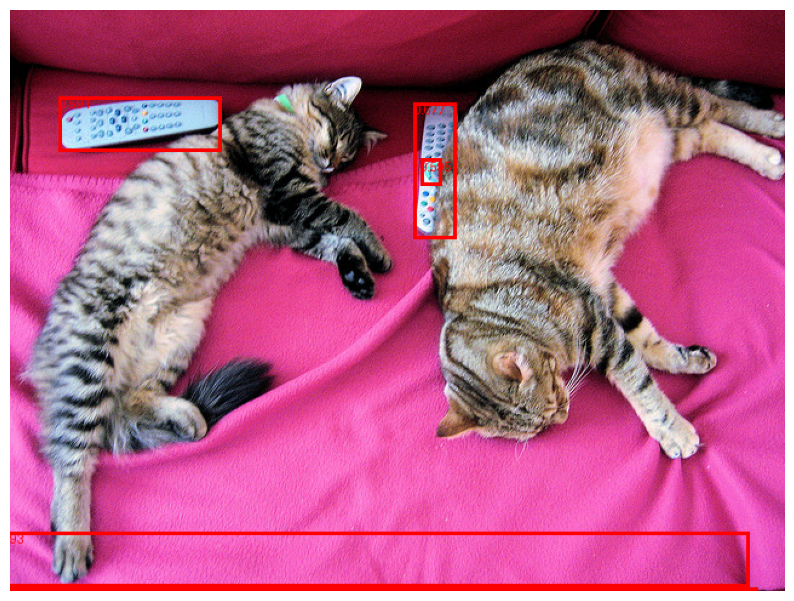

In [3]:
import matplotlib.pyplot as plt
from PIL import ImageDraw
# Copy ảnh gốc để vẽ lên (không sửa original)
image_with_boxes = image.copy()
draw = ImageDraw.Draw(image_with_boxes)

# Vẽ boxes và scores
for box, score in zip(boxes, scores):
    # Box: (x1, y1, x2, y2) - vẽ rectangle màu đỏ, width=3
    draw.rectangle(box.tolist(), outline="red", width=3)
    # Thêm text confidence ở góc trên trái của box
    draw.text((box[0], box[1]), f"{round(score.item(), 3)}", fill="red")

# Hiển thị ảnh với boxes trong notebook
plt.figure(figsize=(10, 10))
plt.imshow(image_with_boxes)
plt.axis("off")  # Tắt trục
plt.show()

In [4]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.1 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of mkl-fft to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of mkl-random to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of mkl-umath to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 21.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 69.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 64.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 56.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
Ultralytics 8.3.226 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
WARNING ⚠️ Video stream unresponsive, please check your IP 

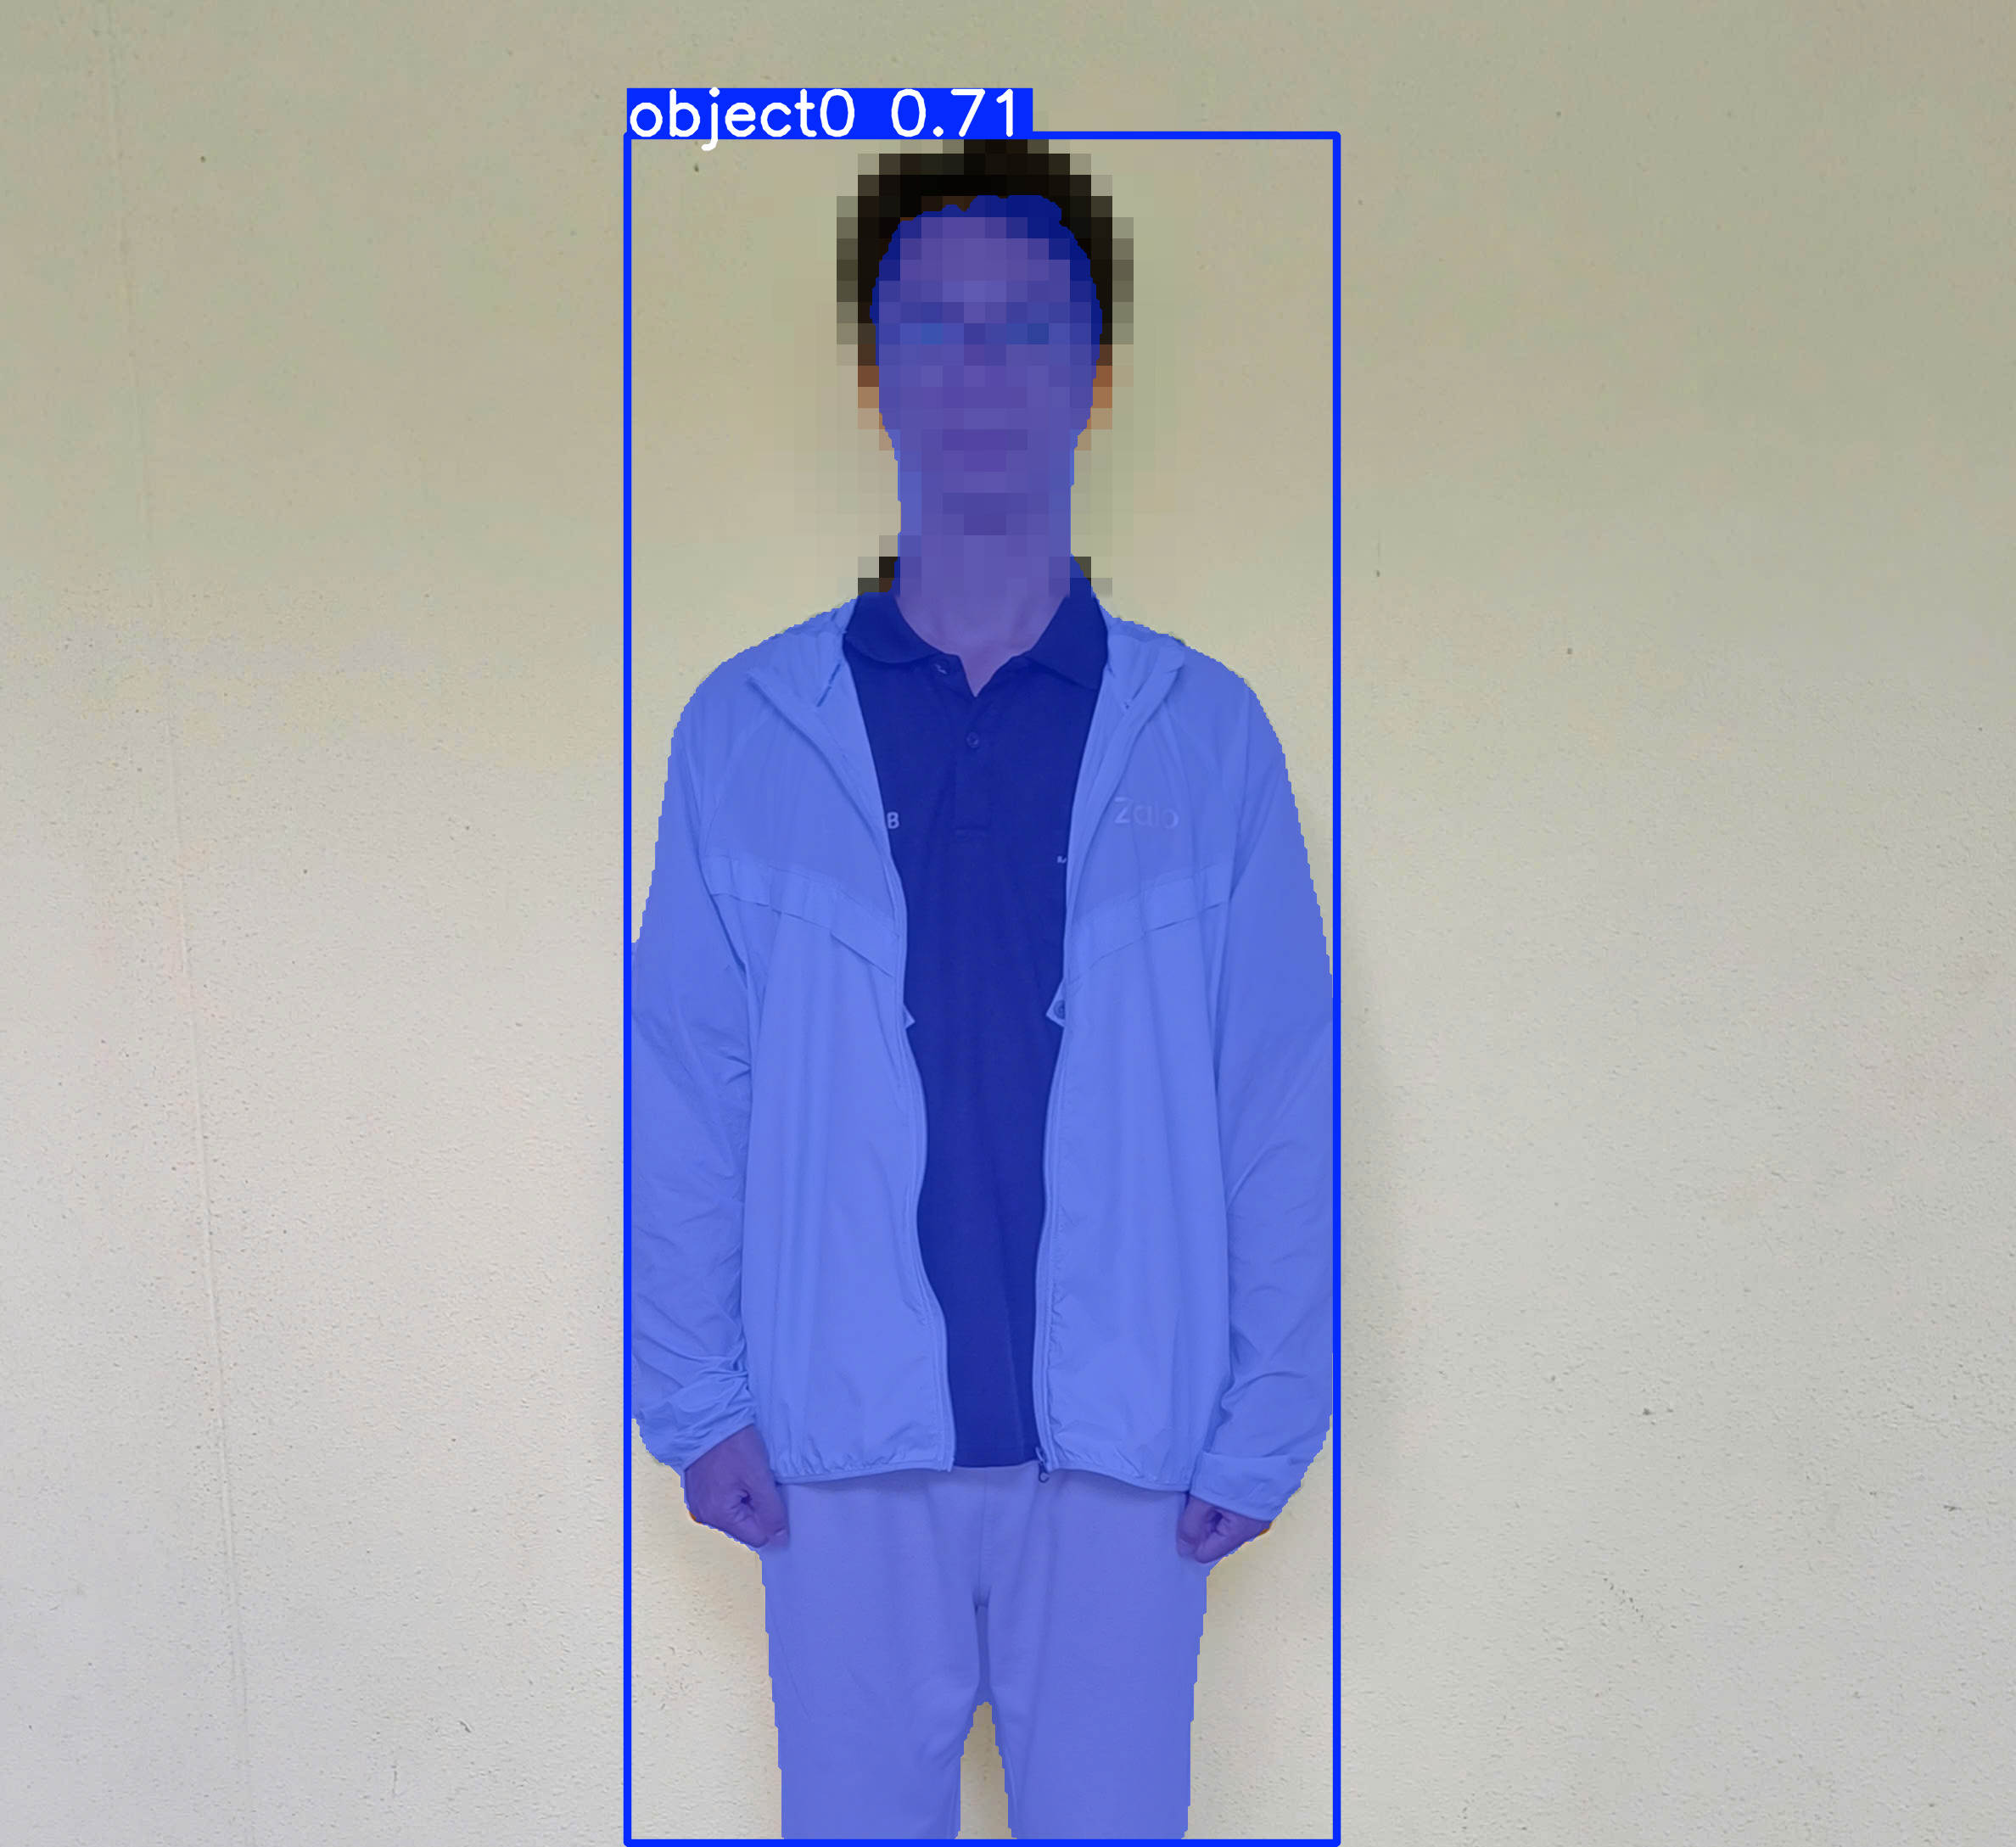

WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.


WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camer

In [ ]:
import numpy as np

from ultralytics import YOLOE
from ultralytics.models.yolo.yoloe import YOLOEVPSegPredictor

# Initialize a YOLOE model
model = YOLOE("yoloe-11l-seg.pt")

# Define visual prompts based on a separate reference image
visual_prompts = dict(
    bboxes=np.array([[221.52, 405.8, 344.98, 857.54]]),  # Box enclosing person
    cls=np.array([0]),  # ID to be assigned for person
)

# Run prediction on a different image, using reference image to guide what to look for
results = model.predict(
    "/kaggle/input/zalo-aic-data/observing/train/samples/Person1_0/object_images/img_1.jpg",  # Target image for detection
    refer_image="https://ultralytics.com/images/bus.jpg",  # Reference image used to get visual prompts
    visual_prompts=visual_prompts,
    predictor=YOLOEVPSegPredictor,
)

# Show results
results[0].show()